In [74]:
import time
import torch
import torchvision
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms as T
from torchvision import io
import torchutils as tu
import numpy as np
import matplotlib.pyplot as plt
import os

In [75]:
device = 'cuda'

In [76]:
trnsfrms_train = T.Compose([
    T.Resize((224, 224)),
    T.RandomHorizontalFlip(), # эта и 2 функции ниже для аугментации
    T.RandomRotation(45),
    T.ColorJitter(brightness=.5, hue=.3),
    T.ToTensor(),
    T.Normalize((.5, .5, .5), (.5, .5, .5))
    ]
)

trnsfrms_valid = T.Compose([
    T.Resize((224, 224)),
    T.ToTensor(),
    T.Normalize((.5, .5, .5), (.5, .5, .5))
    ]
)

In [77]:
train_dataset = torchvision.datasets.ImageFolder('~/ds_bootcamp/sports _class/train', 
                                                 transform=trnsfrms_train)
valid_dataset = torchvision.datasets.ImageFolder('~/ds_bootcamp/sports _class/valid', 
                                                 transform=trnsfrms_valid)

In [78]:
# red_mean = train_dataset.data[: , :, :, 0].mean()/255.
# green_mean = train_dataset.data[: , :, :, 1].mean()/255.
# blue_mean = train_dataset.data[: , :, :, 2].mean()/255.
# print('mean:', red_mean, green_mean, blue_mean)
# red_std = train_dataset.data[: , :, :, 0].std()/255.
# green_std = train_dataset.data[: , :, :, 1].std()/255.
# blue_std = train_dataset.data[: , :, :, 2].std()/255.
# print('std:', red_std, green_std, blue_std)

In [79]:
id_class= {j: i for i, j in train_dataset.class_to_idx.items()}  #  вытаскиваем лейблы из датасета в отдельный словарь
id_class

{0: 'air hockey',
 1: 'ampute football',
 2: 'archery',
 3: 'arm wrestling',
 4: 'axe throwing',
 5: 'balance beam',
 6: 'barell racing',
 7: 'baseball',
 8: 'basketball',
 9: 'baton twirling',
 10: 'bike polo',
 11: 'billiards',
 12: 'bmx',
 13: 'bobsled',
 14: 'bowling',
 15: 'boxing',
 16: 'bull riding',
 17: 'bungee jumping',
 18: 'canoe slamon',
 19: 'cheerleading',
 20: 'chuckwagon racing',
 21: 'cricket',
 22: 'croquet',
 23: 'curling',
 24: 'disc golf',
 25: 'fencing',
 26: 'field hockey',
 27: 'figure skating men',
 28: 'figure skating pairs',
 29: 'figure skating women',
 30: 'fly fishing',
 31: 'football',
 32: 'formula 1 racing',
 33: 'frisbee',
 34: 'gaga',
 35: 'giant slalom',
 36: 'golf',
 37: 'hammer throw',
 38: 'hang gliding',
 39: 'harness racing',
 40: 'high jump',
 41: 'hockey',
 42: 'horse jumping',
 43: 'horse racing',
 44: 'horseshoe pitching',
 45: 'hurdles',
 46: 'hydroplane racing',
 47: 'ice climbing',
 48: 'ice yachting',
 49: 'jai alai',
 50: 'javelin',
 5

In [80]:
BATCH_SIZE = 5 # сделал маленький, т.к. в валиде было всего по 5 изображений

train_loader = DataLoader(train_dataset, shuffle=True, batch_size=BATCH_SIZE)
valid_loader = DataLoader(valid_dataset, shuffle=True, batch_size=BATCH_SIZE)

In [81]:
from torchvision.models import resnet18, ResNet18_Weights #реснет18 решил брать

model = resnet18(weights=ResNet18_Weights.DEFAULT)
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [82]:
model.fc = nn.Linear(512, 100) # заменил последнй слой на количество наших классов
optimizer = torch.optim.Adam(model.parameters(), lr=0.002)
criterion = torch.nn.CrossEntropyLoss()

In [83]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [84]:
# замораживаем все веса в модели
for param in model.parameters():
    param.requires_grad = False

# размораживаем посоедний слой
model.fc.weight.requires_grad = True
model.fc.bias.requires_grad = True

model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [85]:
def fit(model: torch.nn.Module, n_epochs: int = 30, plot_grads: bool = False):

    batch_accs = []
    batch_losses = []
    train_epoch_accuracy = []
    train_epoch_losses = []
    valid_epoch_accuracy = []
    valid_epoch_losses = []
    model.to(device)
    for epoch in range(n_epochs):
        start_time = time.time()
        model.train()
        batch_accs = []
        batch_losses = []
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            
            
            loss = criterion(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            if plot_grads:
                plot_grad_flow(model.named_parameters())
            
            optimizer.step()

            
            preds = torch.argmax(outputs, dim=1) 
            accuracy = (preds == labels).sum() / BATCH_SIZE

            batch_accs.append(accuracy.detach().cpu().numpy())
            batch_losses.append(loss.item())

        train_epoch_accuracy.append(np.mean(batch_accs))
        train_epoch_losses.append(np.mean(batch_losses))

        batch_accs = []
        batch_losses = []
        model.eval()
        for inputs, labels in valid_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            with torch.no_grad():
                outputs = model(inputs)
            preds = torch.argmax(outputs, dim=1) 
            loss = criterion(outputs, labels)
            accuracy = (preds == labels).sum() / BATCH_SIZE
            batch_accs.append(accuracy.detach().cpu().numpy())
            batch_losses.append(loss.item())
        valid_epoch_accuracy.append(np.mean(batch_accs))
        valid_epoch_losses.append(np.mean(batch_losses))




        print(f'Epoch {epoch:02} train metric: {train_epoch_accuracy[-1]:.3f}, train loss: {train_epoch_losses[-1]:.3f}, time: {(time.time() - start_time):.1f}s')
        print(f'\t valid metric: {valid_epoch_accuracy[-1]:.3f}, valid loss: {valid_epoch_losses[-1]:.3f}, time: {(time.time() - start_time):.1f}s')
        print('-'*63)

    return train_epoch_accuracy, train_epoch_losses, valid_epoch_accuracy, valid_epoch_losses

In [86]:
def plot_loss_metrics(tl: list, vl: list, tm: list, vm: list):
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))
    ax[0].plot(tl, label='Train loss')
    ax[0].plot(vl, label='Valid Loss')
    ax[0].legend()
    ax[0].set_title('Loss')

    ax[1].plot(tm, label='Train accuracy')
    ax[1].plot(vm, label='Valid accuracy')
    ax[1].legend()
    ax[1].set_title('Accuracy')

In [87]:
train_acc, train_loss, valid_acc, valid_loss = fit(model, 30, False)
plot_loss_metrics(train_loss, valid_loss, train_acc, valid_acc)

Epoch 00 train metric: 0.234, train loss: 3.478, time: 61.4s
	 valid metric: 0.602, valid loss: 1.423, time: 61.4s
---------------------------------------------------------------
Epoch 01 train metric: 0.374, train loss: 2.679, time: 58.1s
	 valid metric: 0.638, valid loss: 1.267, time: 58.1s
---------------------------------------------------------------
Epoch 02 train metric: 0.409, train loss: 2.576, time: 58.5s
	 valid metric: 0.688, valid loss: 1.294, time: 58.5s
---------------------------------------------------------------
Epoch 03 train metric: 0.427, train loss: 2.547, time: 58.4s
	 valid metric: 0.712, valid loss: 1.237, time: 58.4s
---------------------------------------------------------------
Epoch 04 train metric: 0.454, train loss: 2.480, time: 58.5s
	 valid metric: 0.710, valid loss: 1.285, time: 58.5s
---------------------------------------------------------------
Epoch 05 train metric: 0.459, train loss: 2.514, time: 59.3s
	 valid metric: 0.724, valid loss: 1.297, ti

KeyboardInterrupt: 

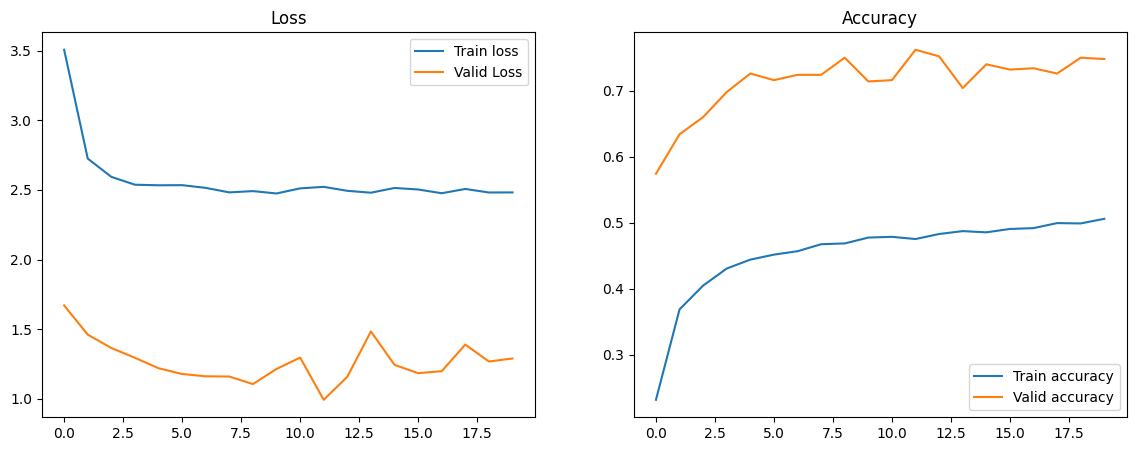

In [88]:
plot_loss_metrics(train_loss, valid_loss, train_acc, valid_acc)

In [89]:
# для проверки итоговой

resize = T.Compose([T.Resize((224, 224)),T.Normalize((.5, .5, .5), (.5, .5, .5))])

In [90]:
img = resize(io.read_image('bobs.jpg'))
model.eval()
plt.imshow(torch.permute(img, (1, 2, 0)))
plt.title(id_class[model(img.unsqueeze(0).to(device)).argmax().item()])

/home/roman/ds_bootcamp/phase_2/nn_project/.venv/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


TypeError: Input tensor should be a float tensor. Got torch.uint8.

In [91]:
torch.save(model.state_dict(), 'models/weights_sport.pth')